In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

# Display full width of columns
pd.set_option('display.max_colwidth', None)



In [4]:
# most popular website
dtype_spec = {20: 'str', 16: 'str'}  # Assuming you want to treat column 20 as a string
bh = pd.read_csv("output/csv/history_visit_items.csv", header=0, dtype=dtype_spec)
bh.head()

#print(bh.groupby(["domain_expansion"]).size().sort_values(ascending=False))

,date,id,history_item,visit_time,title,load_successful,http_non_get,synthesized,redirect_source,redirect_destination,origin,generation,attributes,score,id.1,url,domain_expansion,visit_count,daily_visit_counts,weekly_visit_counts,autocomplete_triggers,should_recompute_derived_visit_counts,visit_count_score,status_code
0,2023-06-05 13:57:59,1363,1,7.076807e+08,"Dreamy Lakehouse Getaway on Robinson Pond - Houses for Rent in Copake, New York, United States - Airbnb",1,0,0,NaN,NaN,1,2,0,20,1,https://www.airbnb.com/rooms/24276079?adults=2&category_tag=Tag%3A8536&enable_m3_private_room=true&pets=1&search_mode=flex_destinations_search&check_in=2023-06-16&check_out=2023-06-19&federated_search_id=c2278c7e-c3e2-43bb-8e4e-87808be219d0&source_impression_id=p3_1685986954_78f5oIDg4M%2FHpeXv&modal=PHOTO_TOUR_SCROLLABLE&modalItem=475812104,airbnb,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
1,2023-06-06 09:33:05,1774,2,7.077512e+08,Your Account | West Elm,1,0,0,NaN,1775.0,1,2,2,0,2,https://www.westelm.com/account/login.html?targetUrl=https%3A%2F%2Fwww.westelm.com%2Faccount%2F,westelm,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
2,2023-06-06 09:33:04,1773,2,7.077512e+08,NaN,1,0,0,1772.0,NaN,1,2,0,20,2,https://www.westelm.com/account/login.html?targetUrl=https%3A%2F%2Fwww.westelm.com%2Faccount%2F,westelm,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
3,2023-06-12 15:24:37,4108,3,7.082907e+08,NaN,1,1,0,NaN,4109.0,1,2,0,20,3,https://www.paypal.com/connect/consent,paypal,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
4,2023-06-09 11:39:25,3121,4,7.080180e+08,Vintage Postmodern Raw Edge Travertine Dining Table For Sale at 1stDibs,1,0,0,NaN,NaN,1,2,0,20,4,https://www.1stdibs.com/furniture/tables/dining-room-tables/vintage-postmodern-raw-edge-travertine-dining-table/id-f_33879232/,1stdibs,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0


In [5]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129325 entries, 0 to 129324
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   date                                   129325 non-null  object 
 1   id                                     129325 non-null  int64  
 2   history_item                           129325 non-null  int64  
 3   visit_time                             129325 non-null  float64
 4   title                                  124084 non-null  object 
 5   load_successful                        129325 non-null  int64  
 6   http_non_get                           129325 non-null  int64  
 7   synthesized                            129325 non-null  int64  
 8   redirect_source                        5846 non-null    float64
 9   redirect_destination                   5802 non-null    float64
 10  origin                                 129325 non-null  

In [6]:
# most popular domain expansion
# get the type of column "domain_expansion"
# replace the NaN values with an empty string
bh["domain_expansion"] = bh["domain_expansion"].replace(np.nan, "") 
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "google" if "google" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "apple" if "apple" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "citi" if "citi" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "americanexpress" if "americanexpress" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "adp" if "adp" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "chase" if "chase" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "microsoft" if "microsoft" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "youtube" if "youtube" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "verizon" if "verizon" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "tmobile" if "tmobile" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "intuit" if "intuit" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "ikea" if "ikea" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "westelm" if "westelm" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "equifax" if "equifax" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "openai" if "openai" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "openai" if "chatgpt" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "adobe" if "adobe" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "facebook" if "facebook" in x else x)
bh["domain_expansion"] = bh["domain_expansion"].apply(lambda x: "yelp" if "yelp" in x else x)
print(bh.groupby(["domain_expansion"]).size().sort_values(ascending=False))


domain_expansion
google                                           105531
                                                   2909
intuit                                             2449
citi                                               1704
amazon                                             1699
dropbox                                            1029
laderach                                            890
airbnb                                              637
ikea                                                560
solutions.sciquest                                  552
americanexpress                                     491
instagram                                           489
adp                                                 302
paypal                                              283
trycaviar                                           272
homedepot                                           241
apple                                               232
miro                           

In [7]:
# look into the most suspicious domain_expansions: ["online.citi", "citi", "global.americanexpress", "paypal", "americanexpress", "secure.bswift", "guardhill.mymortgage-online"]
smaller_df = bh[bh["domain_expansion"].isin(["clientportal.nbprivatewealth", "client.schwab", "citi", "chase", "paypal", "americanexpress", "secure.bswift", "guardhill.mymortgage-online"])]
smaller_df.reset_index(drop=True, inplace=True)
smaller_df.head(1000)



,date,id,history_item,visit_time,title,load_successful,http_non_get,synthesized,redirect_source,redirect_destination,origin,generation,attributes,score,id.1,url,domain_expansion,visit_count,daily_visit_counts,weekly_visit_counts,autocomplete_triggers,should_recompute_derived_visit_counts,visit_count_score,status_code
0,2023-06-12 15:24:37,4108,3,7.082907e+08,NaN,1,1,0,NaN,4109.0,1,2,0,20,3,https://www.paypal.com/connect/consent,paypal,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
1,2023-06-12 17:19:27,4525,8,7.082976e+08,Address List,1,1,0,NaN,NaN,1,2,0,20,8,https://www.paypal.com/businessprofile/settings/addresses,paypal,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
2,2023-06-12 15:29:20,4135,17,7.082910e+08,PayPal: Wallet,1,0,0,NaN,NaN,1,2,4,5,17,https://www.paypal.com/myaccount/money/cards/new,paypal,3,b'\x1e\x00\x00\x00',NaN,NaN,0,30,0
3,2023-06-12 15:27:51,4120,17,7.082909e+08,PayPal: Wallet,1,0,0,NaN,NaN,1,2,4,5,17,https://www.paypal.com/myaccount/money/cards/new,paypal,3,b'\x1e\x00\x00\x00',NaN,NaN,0,30,0
4,2023-06-12 15:24:14,4104,17,7.082907e+08,PayPal: Wallet,1,0,0,NaN,NaN,1,2,0,20,17,https://www.paypal.com/myaccount/money/cards/new,paypal,3,b'\x1e\x00\x00\x00',NaN,NaN,0,30,0
5,2023-06-12 15:23:14,4087,44,7.082906e+08,NaN,1,0,0,NaN,NaN,1,2,2,0,44,https://www.paypal.com/myaccount/preferences/notifications,paypal,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
6,2023-06-12 15:23:10,4085,44,7.082906e+08,NaN,1,0,0,NaN,NaN,1,2,0,20,44,https://www.paypal.com/myaccount/preferences/notifications,paypal,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
7,2023-06-12 17:20:31,4536,46,7.082976e+08,Money,1,0,0,NaN,NaN,1,2,2,0,46,https://www.paypal.com/myaccount/money/flow-return/addCard?success=CC-KD9NVP9ULYEWQ,paypal,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
8,2023-06-12 17:20:30,4534,46,7.082976e+08,NaN,1,0,0,NaN,4535.0,1,2,0,20,46,https://www.paypal.com/myaccount/money/flow-return/addCard?success=CC-KD9NVP9ULYEWQ,paypal,2,b'\x14\x00\x00\x00',NaN,NaN,0,20,0
9,2023-06-12 15:29:11,4131,57,7.082910e+08,PayPal: Wallet,1,0,0,NaN,NaN,1,2,0,20,57,https://www.paypal.com/myaccount/money/banks/new/auto-link-error?error=FASTLINK_TRANSIENT_ERROR&layout=&bankId=undefined,paypal,1,b'\x14\x00\x00\x00',NaN,NaN,0,20,0


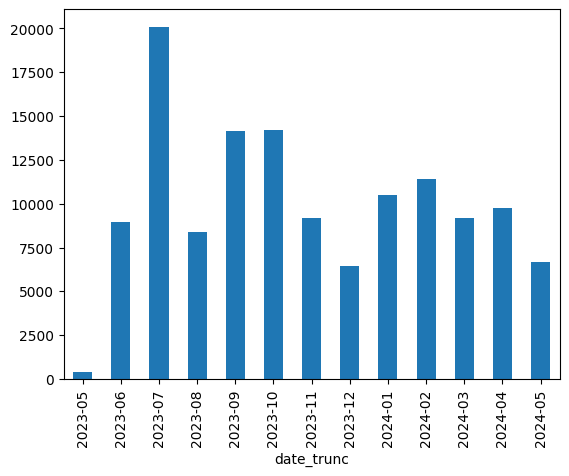

In [8]:
# make a histogram of the number of visits per day using matplotlib
bh["date_trunc"] = pd.to_datetime(bh["date"]).dt.date
bh.sort_values(by="date_trunc", inplace=True)
bh["date_trunc"] = pd.to_datetime(bh["date_trunc"]).dt.to_period("M")
bh.groupby("date_trunc").size().plot(kind="bar")
plt.show()
